In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [2]:
df=pd.read_csv(r"D:\Downloads\winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
x=df.drop(columns='quality')
y=df['quality']

In [5]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=30)

In [7]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1377,5.2,0.490,0.26,2.3,0.090,23.0,74.0,0.99530,3.71,0.62,12.2
1385,8.0,0.810,0.25,3.4,0.076,34.0,85.0,0.99668,3.19,0.42,9.2
1261,6.3,1.020,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2
793,7.7,0.600,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8
99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [8]:
y_train

1377    6
1385    5
1261    4
793     5
99      6
       ..
919     6
1164    5
500     6
941     7
421     7
Name: quality, Length: 1279, dtype: int64

In [9]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
dt_model.predict(x_test)

array([5, 5, 5, 5, 7, 6, 6, 6, 5, 6, 5, 7, 5, 5, 7, 6, 5, 5, 5, 6, 5, 7,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 7, 6, 6, 6, 6,
       6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 7, 4,
       6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 8, 7, 5, 7, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 7, 5, 7, 6, 5, 5, 5, 6, 5, 6, 7, 6, 7, 5, 5, 6, 5,
       6, 5, 5, 7, 7, 6, 6, 6, 5, 6, 6, 6, 7, 6, 7, 5, 6, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5, 5, 6, 7, 7, 5, 5, 6, 5,
       5, 7, 5, 5, 4, 5, 5, 4, 6, 5, 5, 5, 7, 6, 7, 6, 4, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 5, 6, 5, 8, 5, 3, 5, 7, 6, 5, 7, 7,
       5, 8, 8, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 7, 5, 6, 7, 5, 5, 5, 6,
       6, 8, 6, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6, 7, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 7, 5, 4, 4, 7, 6, 5, 7, 7, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 3, 6, 6, 6, 4, 7, 6, 5, 5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       8, 5, 6, 7, 5, 6, 5, 8, 5, 6, 5, 6, 7, 6, 6,

In [11]:
dt_model.score(x_test,y_test)

0.653125

In [12]:
dt_en=DecisionTreeClassifier(criterion="entropy")
dt_en.fit(x_train,y_train)
dt_en.score(x_test,y_test)

0.653125

In [13]:
outfile = open('dt_en_meta.dot','w')
tree.export_graphviz(dt_en,out_file=outfile , feature_names=x.columns)

In [14]:
dir()

['DecisionTreeClassifier',
 'GridSearchCV',
 'In',
 'Out',
 '_',
 '_10',
 '_11',
 '_12',
 '_2',
 '_3',
 '_5',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'accuracy_score',
 'confusion_matrix',
 'df',
 'dt_en',
 'dt_model',
 'exit',
 'get_ipython',
 'np',
 'outfile',
 'pd',
 'quit',
 'roc_auc_score',
 'roc_curve',
 'train_test_split',
 'tree',
 'x',
 'x_test',
 'x_train',
 'y',
 'y_test',
 'y_train']

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.5392704084110335, 0.9722222222222222, 'X[10] <= 10.15\ngini = 0.641\nsamples = 1279\nvalue = [8, 39, 547, 510, 160, 15]'),
 Text(0.3281553515928516, 0.9166666666666666, 'X[6] <= 95.5\ngini = 0.51\nsamples = 640\nvalue = [5, 21, 405, 189, 18, 2]'),
 Text(0.2064272533022533, 0.8611111111111112, 'X[9] <= 0.585\ngini = 0.543\nsamples = 553\nvalue = [5, 20, 325, 183, 18, 2]'),
 Text(0.08386752136752136, 0.8055555555555556, 'X[10] <= 9.75\ngini = 0.453\nsamples = 264\nvalue = [2, 14, 185, 61, 2, 0]'),
 Text(0.04147241647241647, 0.75, 'X[8] <= 3.545\ngini = 0.409\nsamples = 188\nvalue = [1, 12, 140, 34, 1, 0]'),
 Text(0.03836441336441337, 0.6944444444444444, 'X[10] <= 9.075\ngini = 0.395\nsamples = 185\nvalue = [1, 12, 140, 31, 1, 0]'),
 Text(0.017871017871017872, 0.6388888888888888, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.011655011655011656, 0.5833333333333334, 'X[0] <= 7.1\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.0085

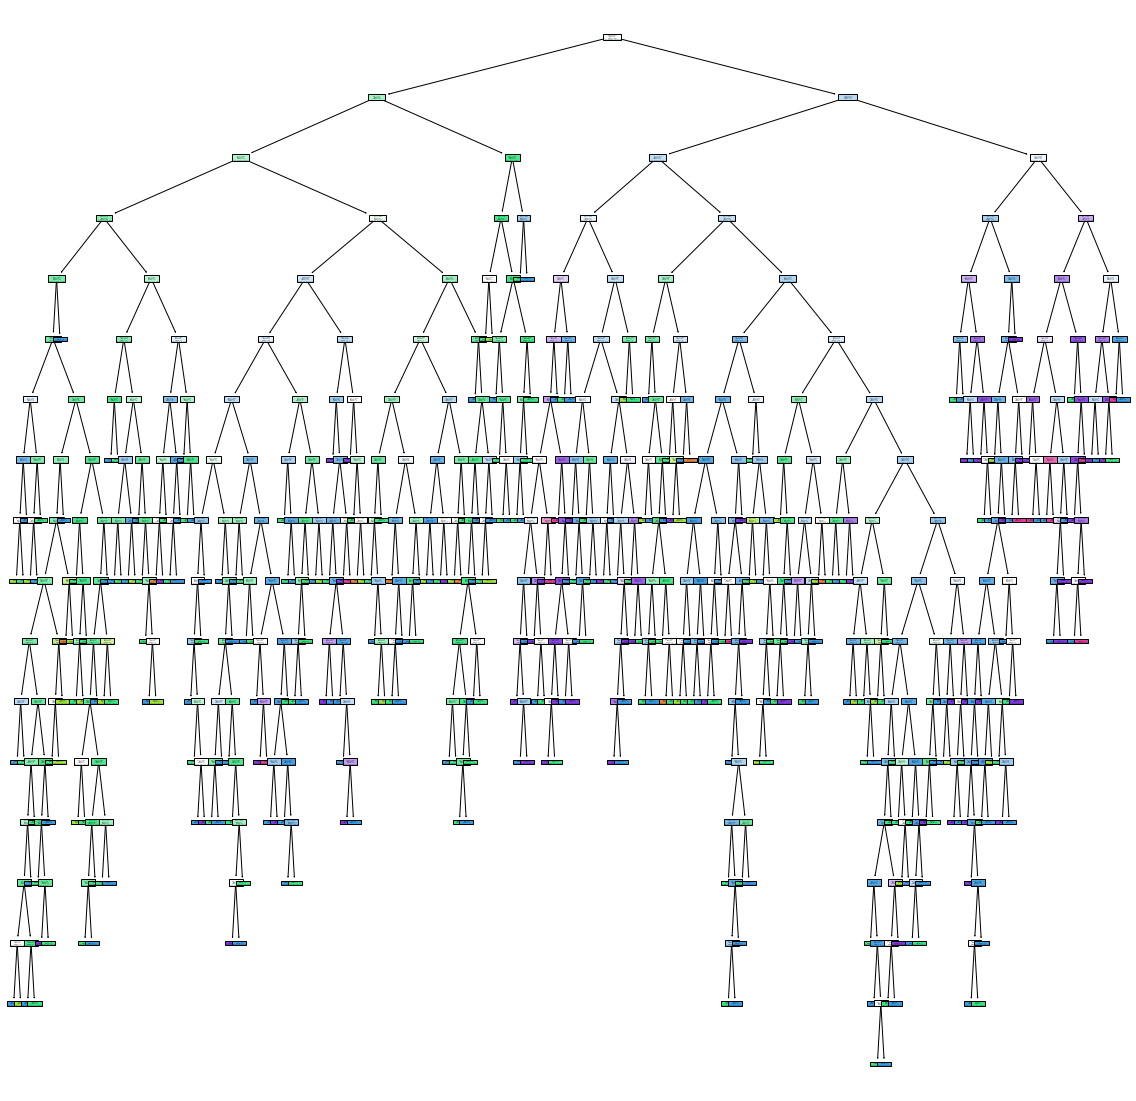

In [16]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [17]:
df1=df.head(500)
x1=df1.drop(columns='quality')
y1=df1.quality
dt_model1=DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(0.43389028819119024, 0.9705882352941176, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.2679240862230553, 0.9117647058823529, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.16658856607310216, 0.8529411764705882, 'X[2] <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(0.07825679475164012, 0.7941176470588235, 'X[10] <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]'),
 Text(0.02999062792877226, 0.7352941176470589, 'X[9] <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]'),
 Text(0.022492970946579195, 0.6764705882352942, 'X[0] <= 7.15\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]'),
 Text(0.01499531396438613, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.02999062792877226, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.03748828491096532, 0.6764705882352942, 'gini =

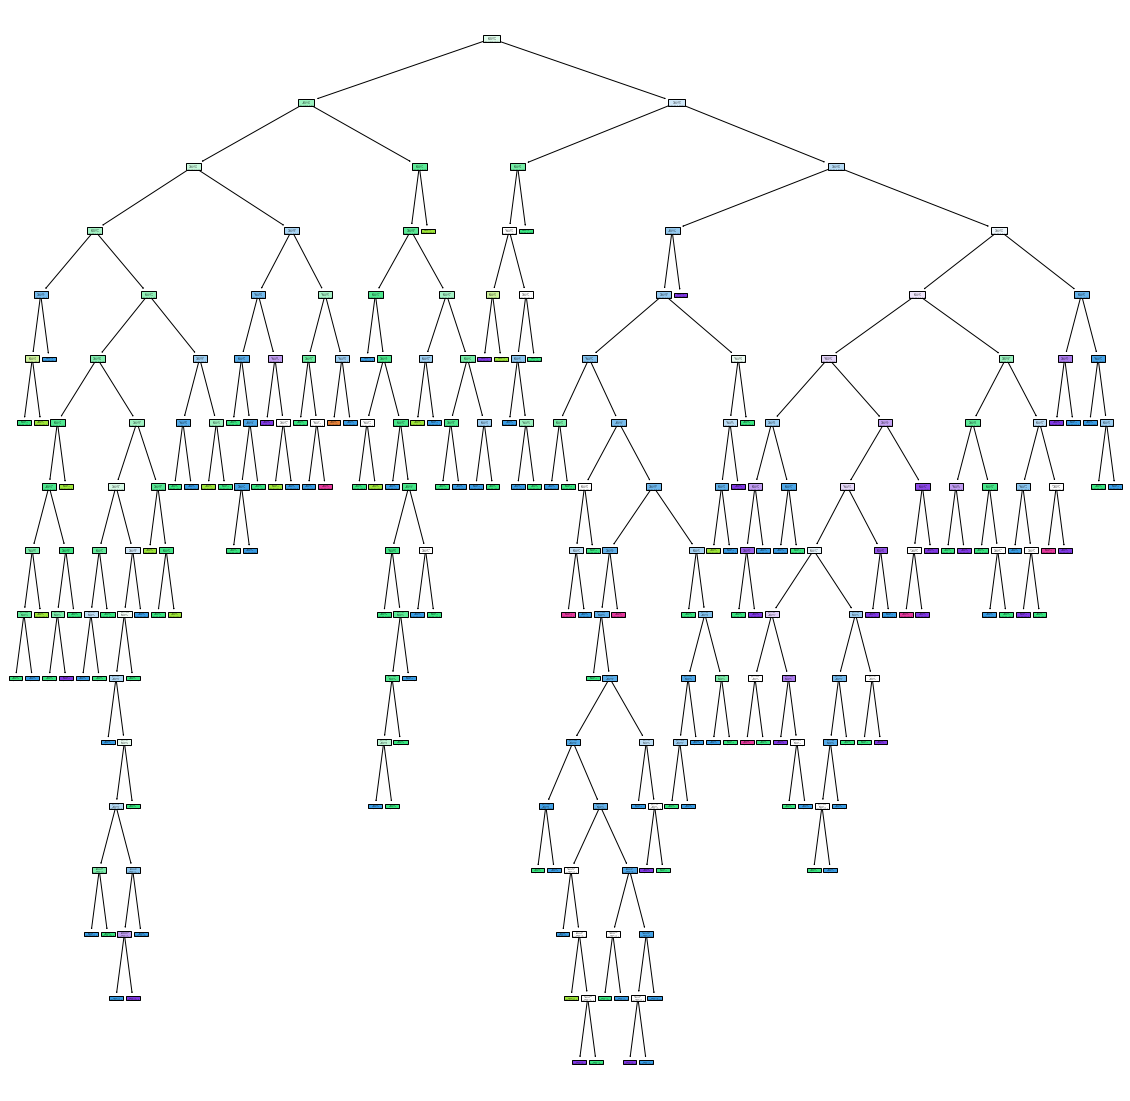

In [18]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True)

In [19]:
set(y1)

{3, 4, 5, 6, 7, 8}

In [20]:
#Pronning operation

In [21]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [22]:
dt_model1.score(x1,y1)

1.0

In [23]:
dt_model1.score(x1,y1)

1.0

In [24]:
dt_model1.score(x_test,y_test)

0.575

In [25]:
path=dt_model1.cost_complexity_pruning_path(x1,y1)
path

{'ccp_alphas': array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
        0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.00247552, 0.00261111,
        0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
        0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
        0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
        0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
        0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
        0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
        0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
        0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
        0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
        0.00656364, 0.00671079, 0.

In [26]:
ccp_alpha=path['ccp_alphas']
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.00247552, 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
       0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
       0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
       0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
       0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
       0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
       0.00656364, 0.00671079, 0.0067591 , 0.00688352, 0.00688

In [27]:
dt_model2=[]
for ccp in ccp_alpha:
    dt_m=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
dt_model2    

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.0018500000000000005),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.00262769230

In [28]:
#train_score=dt_model1.score(x1,y1) for i in 

In [29]:
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.00247552, 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
       0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
       0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
       0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
       0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
       0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
       0.00656364, 0.00671079, 0.0067591 , 0.00688352, 0.00688

In [30]:
train_score=[i.score(x1,y1) for i in dt_model2]
train_score

[1.0,
 0.996,
 0.994,
 0.994,
 0.992,
 0.99,
 0.986,
 0.988,
 0.96,
 0.962,
 0.962,
 0.964,
 0.962,
 0.962,
 0.962,
 0.96,
 0.962,
 0.962,
 0.958,
 0.95,
 0.948,
 0.934,
 0.93,
 0.932,
 0.928,
 0.932,
 0.932,
 0.932,
 0.932,
 0.928,
 0.924,
 0.916,
 0.916,
 0.914,
 0.916,
 0.91,
 0.916,
 0.904,
 0.908,
 0.9,
 0.898,
 0.9,
 0.898,
 0.898,
 0.89,
 0.884,
 0.886,
 0.88,
 0.884,
 0.88,
 0.874,
 0.868,
 0.858,
 0.856,
 0.854,
 0.848,
 0.856,
 0.842,
 0.848,
 0.834,
 0.828,
 0.814,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.636,
 0.596,
 0.596,
 0.558,
 0.478]

In [31]:
test_score=[i.score(x_test,y_test) for i in dt_model2]
test_score

[0.590625,
 0.6,
 0.584375,
 0.565625,
 0.575,
 0.58125,
 0.590625,
 0.571875,
 0.58125,
 0.559375,
 0.56875,
 0.578125,
 0.603125,
 0.59375,
 0.571875,
 0.58125,
 0.575,
 0.578125,
 0.590625,
 0.578125,
 0.59375,
 0.58125,
 0.60625,
 0.584375,
 0.584375,
 0.571875,
 0.6125,
 0.60625,
 0.6,
 0.590625,
 0.6,
 0.5875,
 0.578125,
 0.58125,
 0.5875,
 0.59375,
 0.596875,
 0.578125,
 0.603125,
 0.58125,
 0.590625,
 0.565625,
 0.590625,
 0.609375,
 0.575,
 0.596875,
 0.609375,
 0.6,
 0.6,
 0.59375,
 0.603125,
 0.590625,
 0.60625,
 0.590625,
 0.59375,
 0.584375,
 0.596875,
 0.590625,
 0.609375,
 0.59375,
 0.590625,
 0.590625,
 0.596875,
 0.6,
 0.6,
 0.584375,
 0.58125,
 0.58125,
 0.578125,
 0.571875,
 0.56875,
 0.575,
 0.5625,
 0.56875,
 0.56875,
 0.571875,
 0.565625,
 0.5625,
 0.56875,
 0.55,
 0.5625,
 0.5625,
 0.553125,
 0.553125,
 0.528125,
 0.528125,
 0.553125,
 0.553125,
 0.528125,
 0.41875]

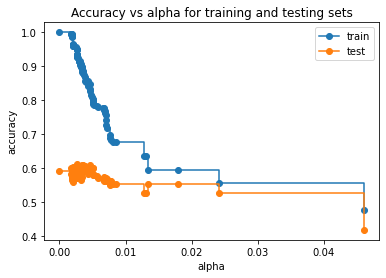

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#Bagging

In [33]:
dt_model_ccp=DecisionTreeClassifier(random_state=0,ccp_alpha=.014)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

[Text(0.5, 0.8333333333333334, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.25, 0.5, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(0.75, 0.5, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

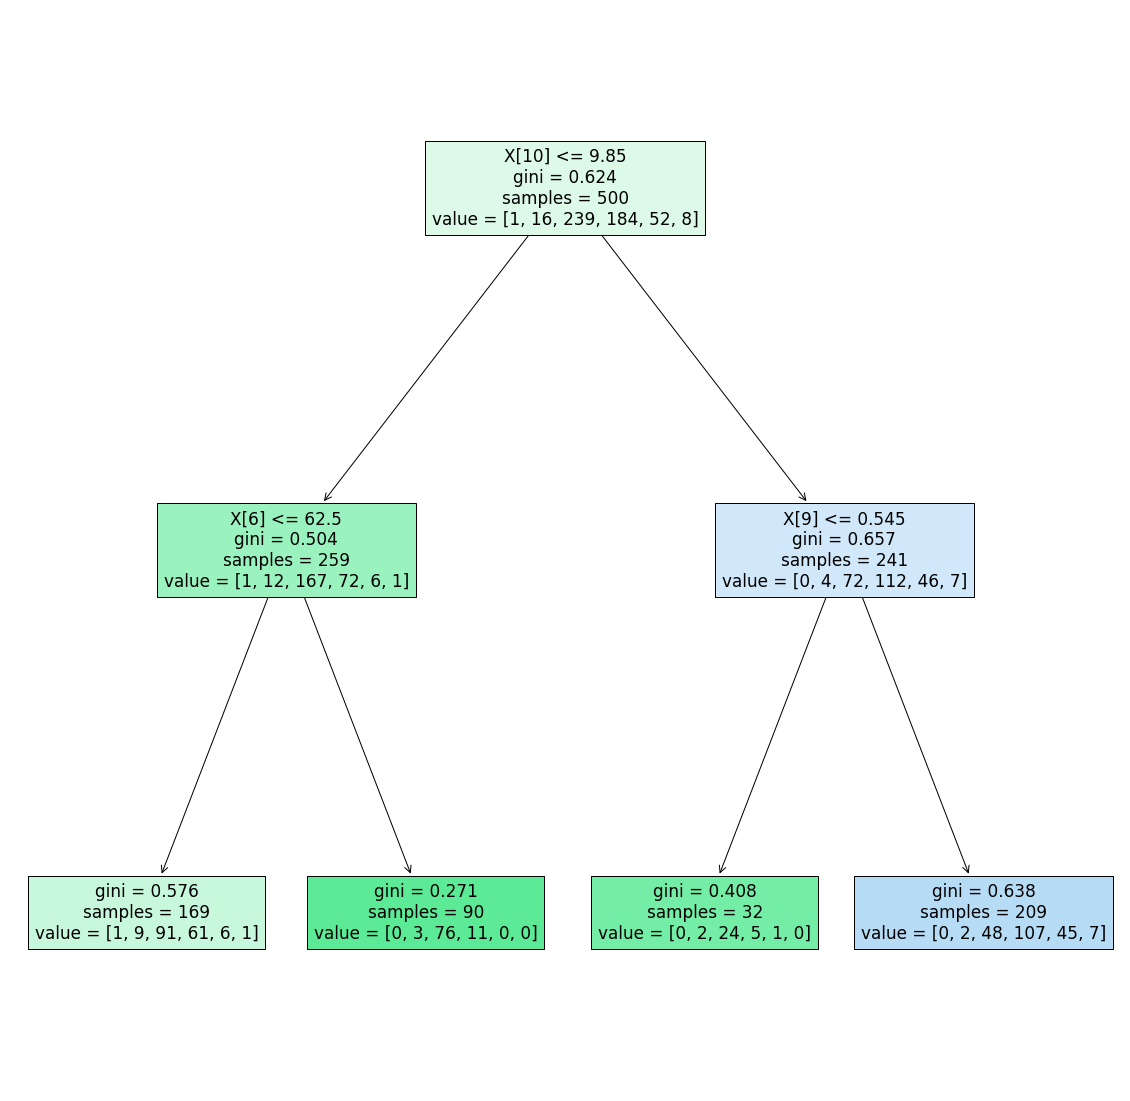

In [34]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [35]:
dt_model_ccp.score(x1,y1)

0.596

In [36]:
dt_model_ccp.score(x_test,y_test)

0.553125

In [37]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }

In [92]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 )

In [ ]:
grid_ccp.fit(x1,y1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
grid_ccp.best_params_

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [41]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)

In [42]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [43]:
bag_dt.predict(x_test)

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 7, 7, 5, 6, 4, 6, 5,
       6, 7, 5, 5, 5, 7, 5, 6, 5, 5, 6, 5, 7, 7, 5, 6, 7, 6, 5, 7, 5, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 4, 6, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 5, 7, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 7, 7, 6, 5, 6, 5, 5, 7, 7, 5, 5, 6, 7, 5, 6,
       6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6,
       6, 7, 7, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5,
       5, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 4, 6, 6, 5, 6, 5, 6, 5, 5, 6,

In [44]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [45]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [46]:
bag_dt.estimator_params

()

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
bag_knn=BaggingClassifier(KNeighborsClassifier(6),n_estimators=10)

In [49]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [51]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 5, 8, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6,
       5, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier(n_estimators=5)

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [60]:
rf.score(x_test,y_test)

0.645

In [61]:
bag_dt.score(x_test,y_test)

0.6625

In [62]:
bag_knn.score(x_test,y_test)

0.5025

In [63]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1101914183),
 DecisionTreeClassifier(max_features='auto', random_state=229418402),
 DecisionTreeClassifier(max_features='auto', random_state=723967816),
 DecisionTreeClassifier(max_features='auto', random_state=1962218747),
 DecisionTreeClassifier(max_features='auto', random_state=154123714)]

[Text(0.5137020128173221, 0.9736842105263158, 'X[9] <= 0.625\ngini = 0.648\nsamples = 749\nvalue = [2, 43, 515, 460, 164, 15]'),
 Text(0.1805469138875062, 0.9210526315789473, 'X[2] <= 0.065\ngini = 0.563\nsamples = 393\nvalue = [2, 34, 361, 188, 35, 0]'),
 Text(0.07565953210552513, 0.868421052631579, 'X[1] <= 0.652\ngini = 0.658\nsamples = 100\nvalue = [2, 19, 63, 59, 9, 0]'),
 Text(0.029865604778496764, 0.8157894736842105, 'X[9] <= 0.475\ngini = 0.592\nsamples = 54\nvalue = [0, 3, 30, 46, 8, 0]'),
 Text(0.011946241911398706, 0.7631578947368421, 'X[4] <= 0.071\ngini = 0.124\nsamples = 10\nvalue = [0, 0, 14, 0, 1, 0]'),
 Text(0.007964161274265804, 0.7105263157894737, 'X[1] <= 0.62\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 0, 1, 0]'),
 Text(0.003982080637132902, 0.6578947368421053, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.011946241911398706, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.015928322548531607, 0.710526315789473

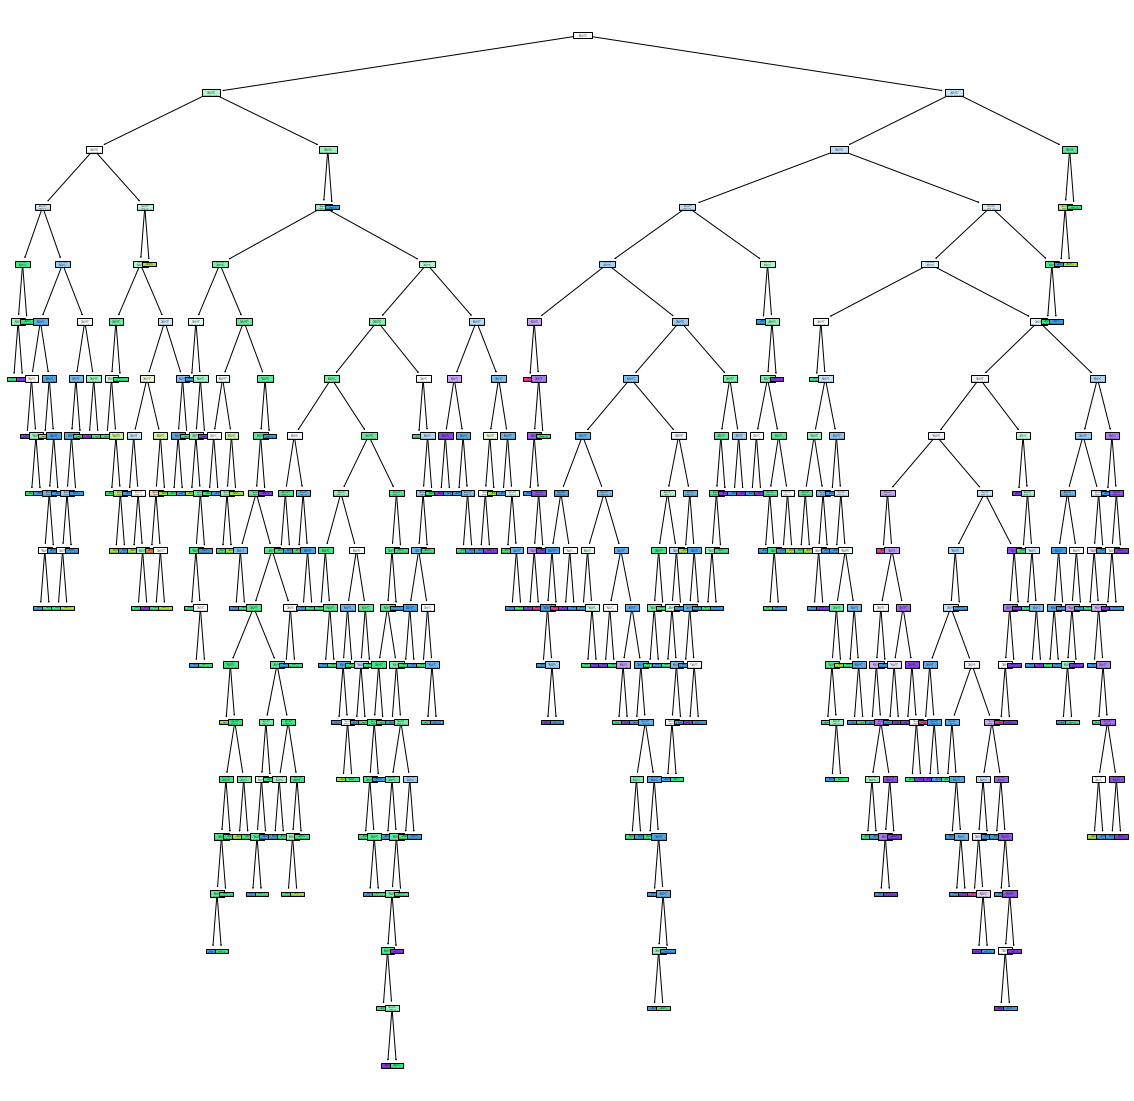

In [64]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

In [65]:
grid_param={"n_estimators":[5,10,50,100,150,200],'criterion':['gini','entropy'],'max_depth':range(10),'min_sample_leaf':range(10)}

In [69]:
grid_search_rf=GridSearchCV(param_grid=grid_param,cv=10,n_jobs=6,verbose=1,estimator=rf)

In [70]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


ValueError: Invalid parameter min_sample_leaf for estimator RandomForestClassifier(max_depth=0, n_estimators=5). Check the list of available parameters with `estimator.get_params().keys()`.

In [71]:
rf_new=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,n_estimators=120)

In [73]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [74]:
rf_new.score(x_test,y_test)

0.675